# Method comparison

Comparison between the detections in the original images and the processed by Deeplav3 + OpenCV post-processing

## Path definitions

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
ORIGINAL_RESULTS = "/content/drive/MyDrive/TFM/comparison_files/original_predictions.csv"
YOLO_RESULTS = "/content/drive/MyDrive/TFM/comparison_files/people_crop_predictions.csv"
CROP_RESULTS = "/content/drive/MyDrive/TFM/comparison_files/segmentation_crop_predictions.csv"

ORIGINAL_METRICS = "/content/drive/MyDrive/TFM/comparison_files/original_metrics.csv"
YOLO_METRICS = "/content/drive/MyDrive/TFM/comparison_files/people_crop_metrics.csv"
CROP_METRICS = "/content/drive/MyDrive/TFM/comparison_files/segmentation_crop_metrics.csv"

## Read predictions


In [3]:
import pandas as pd
import ntpath
import os
import matplotlib.pyplot as plt

In [6]:
original_df = pd.read_csv(ORIGINAL_RESULTS)
yolo_df = pd.read_csv(YOLO_RESULTS)
crop_df = pd.read_csv(CROP_RESULTS)

original_metrics_df = pd.read_csv(ORIGINAL_METRICS)
yolo_metrics_df = pd.read_csv(YOLO_METRICS)
crop_metrics_df = pd.read_csv(CROP_METRICS)

In [7]:
original_df.describe()

,Unnamed: 0,x_min,y_min,x_max,y_max,score
count,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,573.500000,1061.672474,499.052265,1118.926829,545.965157,92.979094
std,331.543361,364.291907,166.376997,364.905632,172.115122,8.354999
min,0.000000,-32.000000,16.000000,32.000000,80.000000,70.000000
25%,286.750000,848.000000,400.000000,912.000000,448.000000,89.000000
50%,573.500000,1088.000000,464.000000,1152.000000,528.000000,98.000000
75%,860.250000,1280.000000,608.000000,1328.000000,640.000000,99.000000
max,1147.000000,1856.000000,1040.000000,1936.000000,1072.000000,99.000000


In [12]:
yolo_df.describe()

,Unnamed: 0,x_min,y_min,x_max,y_max,score
count,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,89.68750,266.312500,148.770833,315.020833,95.067708
std,221.846794,67.46168,165.744046,79.677509,176.336882,6.933892
min,0.000000,-16.00000,16.000000,16.000000,32.000000,70.000000
25%,191.750000,48.00000,160.000000,96.000000,192.000000,94.000000
50%,383.500000,80.00000,224.000000,128.000000,272.000000,99.000000
75%,575.250000,112.00000,336.000000,192.000000,384.000000,99.000000
max,767.000000,464.00000,992.000000,512.000000,1024.000000,99.000000


In [13]:
crop_df.describe()

,Unnamed: 0,x_min,y_min,x_max,y_max,score
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,224.000000,66.351893,200.730512,133.879733,255.465479,94.888641
std,129.759393,52.330261,112.018657,62.629821,121.534237,7.305886
min,0.000000,-32.000000,0.000000,32.000000,48.000000,70.000000
25%,112.000000,32.000000,128.000000,96.000000,176.000000,95.000000
50%,224.000000,48.000000,176.000000,112.000000,224.000000,99.000000
75%,336.000000,80.000000,240.000000,160.000000,304.000000,99.000000
max,448.000000,384.000000,736.000000,464.000000,800.000000,99.000000


In [16]:
original_metrics_df.describe()

,Unnamed: 0,mAP
count,489.000000,489.000000
mean,244.000000,0.827409
std,141.306405,0.320691
min,0.000000,0.000000
25%,122.000000,0.833333
50%,244.000000,1.000000
75%,366.000000,1.000000
max,488.000000,1.000000


In [14]:
yolo_metrics_df.describe()

,Unnamed: 0,mAP
count,631.00000,631.000000
mean,315.00000,0.732171
std,182.29829,0.435957
min,0.00000,0.000000
25%,157.50000,0.000000
50%,315.00000,1.000000
75%,472.50000,1.000000
max,630.00000,1.000000


In [15]:
crop_metrics_df.describe()

,Unnamed: 0,mAP
count,382.000000,382.000000
mean,190.500000,0.743455
std,110.418145,0.434287
min,0.000000,0.000000
25%,95.250000,0.125000
50%,190.500000,1.000000
75%,285.750000,1.000000
max,381.000000,1.000000


## Perform further analysis

In [17]:
def get_original(crop_name):
  folder = f'{crop_name.split("_")[1]}_{crop_name.split("_")[2]}'
  return original_df[original_df['name'] == folder]

In [18]:
def get_from_original(image_name):
  return crop_df[crop_df['name'].str.endswith(image_name)]

In [19]:
original_df['name'] = original_df['name'].apply(lambda x: ntpath.basename(x))
crop_df['name'] = crop_df['name'].apply(lambda x: ntpath.basename(x))

In [20]:
original_df.drop('Unnamed: 0', inplace=True, axis=1)

In [21]:
crop_df.drop('Unnamed: 0', inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


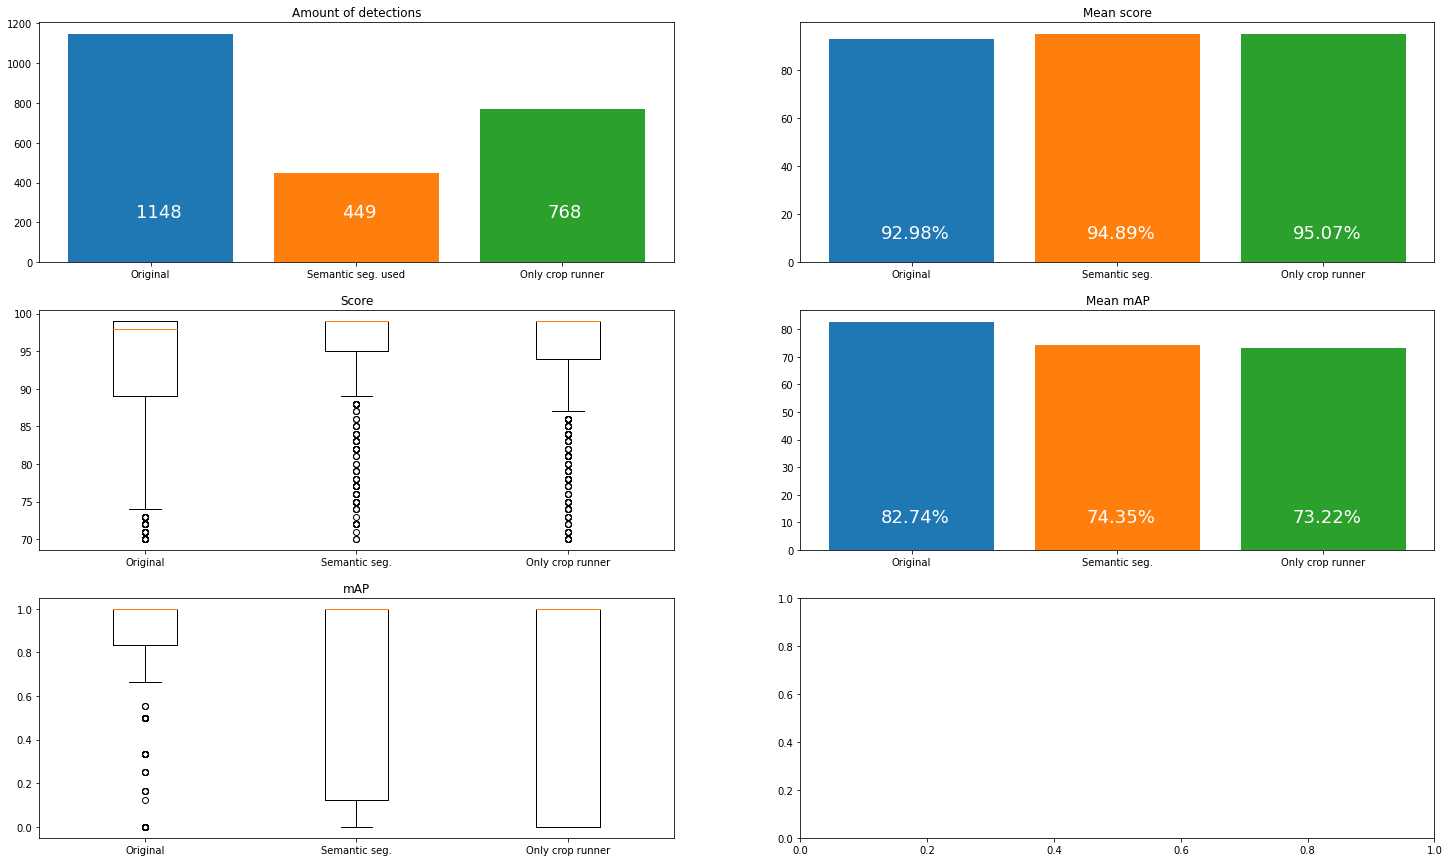

In [34]:
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(25, 15)

# Amount of images

indexes = [0, 1, 2]
heights = [len(original_df.index), len(crop_df.index), len(yolo_df.index)]
labels = ['Original', 'Semantic seg. used', 'Only crop runner']

axs[0, 0].bar(indexes[0], heights[0])
axs[0, 0].bar(indexes[1], heights[1])
axs[0, 0].bar(indexes[2], heights[2])

axs[0, 0].set_title('Amount of detections')
axs[0, 0].set_xticks(indexes)
axs[0, 0].set_xticklabels(labels)

for i, v in enumerate(labels):
  axs[0, 0].text(-0.07 + i, min(heights)/2, heights[i], fontsize=18, color=(1,1,1,1))

# Mean Score

heights = [original_df['score'].mean(), crop_df['score'].mean(), yolo_df['score'].mean()]
labels = ['Original', 'Semantic seg.', 'Only crop runner']

axs[0, 1].bar(indexes[0], heights[0])
axs[0, 1].bar(indexes[1], heights[1])
axs[0, 1].bar(indexes[2], heights[2])

axs[0, 1].set_title('Mean score')
axs[0, 1].set_xticks(indexes)
axs[0, 1].set_xticklabels(labels)

for i, v in enumerate(labels):
  axs[0, 1].text(-0.15 + i, 10, f'{round(heights[i], 2)}%', fontsize=18, color=(1,1,1,1))


# Boxplot scores

heights = [original_df['score'].to_numpy(), crop_df['score'].to_numpy(), yolo_df['score'].to_numpy()]
labels = ['Original', 'Semantic seg.', 'Only crop runner']

axs[1, 0].boxplot([heights[0], heights[1], heights[2]])

axs[1, 0].set_title('Score')
axs[1, 0].set_xticklabels(labels)

# mAP scores

heights = [original_metrics_df['mAP'].mean()*100, crop_metrics_df['mAP'].mean()*100, yolo_metrics_df['mAP'].mean()*100]
labels = ['Original', 'Semantic seg.', 'Only crop runner']

axs[1, 1].bar(indexes[0], heights[0])
axs[1, 1].bar(indexes[1], heights[1])
axs[1, 1].bar(indexes[2], heights[2])

axs[1, 1].set_title('Mean mAP')
axs[1, 1].set_xticks(indexes)
axs[1, 1].set_xticklabels(labels)

for i, v in enumerate(labels):
  axs[1, 1].text(-0.15 + i, 10, f'{round(heights[i], 2)}%', fontsize=18, color=(1,1,1,1))

# Boxplot mAP

heights = [original_metrics_df['mAP'].to_numpy(), crop_metrics_df['mAP'].to_numpy(), yolo_metrics_df['mAP'].to_numpy()]
labels = ['Original', 'Semantic seg.', 'Only crop runner']

axs[2, 0].boxplot([heights[0], heights[1], heights[2]])

axs[2, 0].set_title('mAP')
axs[2, 0].set_xticklabels(labels)

plt.show()